# 导入库

In [2]:
import numpy as np
import _pickle as cPickle
import gzip
from scipy import ndimage
import matplotlib.pyplot as plt
%matplotlib inline

# 载入图像相关函数

In [3]:
def load_data():
    """Return the MNIST data as a tuple containing the training data,
    the validation data, and the test data.
    The ``training_data`` is returned as a tuple with two entries.
    The first entry contains the actual training images.  This is a
    numpy ndarray with 50,000 entries.  Each entry is, in turn, a
    numpy ndarray with 784 values, representing the 28 * 28 = 784
    pixels in a single MNIST image.
    The second entry in the ``training_data`` tuple is a numpy ndarray
    containing 50,000 entries.  Those entries are just the digit
    values (0...9) for the corresponding images contained in the first
    entry of the tuple.
    The ``validation_data`` and ``test_data`` are similar, except
    each contains only 10,000 images.
    This is a nice data format, but for use in neural networks it's
    helpful to modify the format of the ``training_data`` a little.
    That's done in the wrapper function ``load_data_wrapper()``, see
    below.
    """
    f = gzip.open('../data/mnist.pkl.gz', 'rb')
    training_data, validation_data, test_data = cPickle.load(f, encoding='latin1')
    f.close()
    return (training_data, validation_data, test_data)

def load_data_wrapper(augmentation=False):
    """Return a tuple containing ``(training_data, validation_data,
    test_data)``. Based on ``load_data``, but the format is more
    convenient for use in our implementation of neural networks.
    In particular, ``training_data`` is a list containing 50,000
    2-tuples ``(x, y)``.  ``x`` is a 784-dimensional numpy.ndarray
    containing the input image.  ``y`` is a 10-dimensional
    numpy.ndarray representing the unit vector corresponding to the
    correct digit for ``x``.
    ``validation_data`` and ``test_data`` are lists containing 10,000
    2-tuples ``(x, y)``.  In each case, ``x`` is a 784-dimensional
    numpy.ndarry containing the input image, and ``y`` is the
    corresponding classification, i.e., the digit values (integers)
    corresponding to ``x``.
    Obviously, this means we're using slightly different formats for
    the training data and the validation / test data.  These formats
    turn out to be the most convenient for use in our neural network
    code."""
    tr_d, va_d, te_d = load_data()
    training_inputs = [np.reshape(x, (784, 1)) for x in tr_d[0]]
    training_results = [vectorized_result(y) for y in tr_d[1]]
    if augmentation: training_inputs, training_results = expend_training_data(training_inputs, training_results)
    training_data = list(zip(training_inputs, training_results))
    validation_inputs = [np.reshape(x, (784, 1)) for x in va_d[0]]
    validation_data = list(zip(validation_inputs, va_d[1]))
    test_inputs = [np.reshape(x, (784, 1)) for x in te_d[0]]
    test_data = list(zip(test_inputs, te_d[1]))
    return (training_data, validation_data, test_data)


def vectorized_result(j):
    """Return a 10-dimensional unit vector with a 1.0 in the jth
    position and zeroes elsewhere.  This is used to convert a digit
    (0...9) into a corresponding desired output from the neural
    network."""
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

# Augment training data
def expend_training_data(images, labels):

    expanded_images = []
    expanded_labels = []

    j = 0 # counter
    for x, y in zip(images, labels):
        j = j+1
        if j%100==0:
            print ('expanding data : %03d / %03d' % (j,np.size(images,0)))

        # register original data
        expanded_images.append(x)
        expanded_labels.append(y)

        # get a value for the background
        # zero is the expected value, but median() is used to estimate background's value
        bg_value = np.median(x) # this is regarded as background's value
        image = np.reshape(x, (-1, 28))

        for i in range(4):

            ## Augmentation via Rotation
            # rotate the image with random degree
            angle = np.random.randint(-15,15,1)
            new_img = ndimage.rotate(image,angle,reshape=False, cval=bg_value)

            # shift the image with random distance
            shift = np.random.randint(-2, 2, 2)
            new_img_ = ndimage.shift(new_img,shift, cval=bg_value)

            # register new training data
            expanded_images.append(np.reshape(new_img_, [784,1]))
            expanded_labels.append(y)


    return expanded_images, expanded_labels

# 载入数据

In [4]:
training_data, validation_data, test_data = load_data_wrapper()

In [6]:
print(len(training_data))
print(len(validation_data))
print(len(test_data))
# print(training_data[0])

50000
10000
10000


In [7]:
print(training_data[0])

(array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.  

In [8]:
print(training_data[0][1])

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


# 数据显示

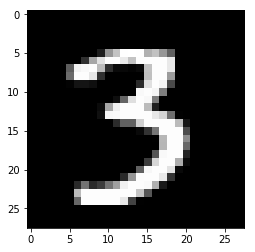

3


In [14]:
index = 10000
pixels = training_data[index][0].reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()
print(np.argmax(training_data[index][1]))

# 训练参数

In [5]:
n_epoch = 30
learning_rate = 1
batch_size = 10

# 网络结构

In [6]:
n_node_input = 784
n_node_output = 10

# 权重与偏置

In [7]:
W=np.random.randn(n_node_output, n_node_input)
b=np.random.randn(n_node_output, 1)

# 激活函数

In [8]:
def sigmoid(z):
    """The sigmoid function."""
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    """Derivative of the sigmoid function."""
    return sigmoid(z)*(1-sigmoid(z))

# 开始训练

In [12]:
test_errors = []
training_errors = []
n = len(training_data)

for j in range(n_epoch):
    ## Stochastic Gradient Descent
    np.random.shuffle(training_data)
    # for each batch
    sum_of_training_error = 0
    for k in range(0, n, batch_size):
        batch = training_data[k:k+batch_size]
        # average gradient for samples in a batch
        sum_gradient_b = 0
        sum_gradient_W = 0
        # for each sample
        for x, y in batch:
            ## Feed forward
            a1 = x
            z2 = np.dot(W, a1) + b
            a2 = sigmoid(z2)
            print(a1.shape, z2.shape, a2.shape)
            ## Backpropagation
            # Step 1: Error at the output layer [Quadratic Cost]
            delta_2 = (a2-y)*sigmoid_prime(z2)
            print(delta_2.shape)
            # Step 2: Gradient of C in terms of bias
            gradient_b = delta_2
            # Step 3: Gradient of C in terms of weight
            gradient_W = np.dot(delta_2, a1.transpose())
            print(gradient_W.shape)
            # update gradients
            sum_gradient_b += gradient_b
            sum_gradient_W += gradient_W
            print(sum_gradient_b.shape, sum_gradient_W.shape)
            ## Training Error
            sum_of_training_error += int(np.argmax(a2) != np.argmax(y))
        # update weights & biases
        b -= learning_rate * sum_gradient_b / batch_size
        W -= learning_rate * sum_gradient_W / batch_size
    # Report Training Error
    print("[TRAIN_ERROR] Epoch %02d: %5d / %05d" % (j, sum_of_training_error, n))
    training_errors.append(np.float(sum_of_training_error) / n)
    ### Test
    n_test = len(test_data)
    sum_of_test_error = 0
    for x, y in test_data:
        ## Feed forward
        a1 = x
        z2 = np.dot(W, a1) + b
        a2 = sigmoid(z2)
        ## Test Error
        # in test data, label info is a number not one-hot vector as in training data
        sum_of_test_error += int(np.argmax(a2) != y)
    # Report Test Error
    print("[ TEST_ERROR] Epoch %02d: %5d / %05d" % (j, sum_of_test_error, n_test))
    test_errors.append(np.float(sum_of_test_error)/n_test)
    
print("done!")


(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)

(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)

(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)

(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 

(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 

(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)

(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 7

(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 

(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 1) (10, 1) (10, 1)
(10, 1)
(10, 784)
(10, 1) (10, 784)
(784, 

KeyboardInterrupt: 